In [1]:
%load_ext autoreload
%autoreload 2

# adding parent directory to import path
# otherwise simply place the 'network' folder in the same directory
import sys
import os
parent = os.path.dirname(os.path.abspath(''))
sys.path.append(parent)


import network

import gc
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
### MNIST classification

# load
train = pd.read_csv("mnist_train.csv", header=None)
test = pd.read_csv("mnist_test.csv", header=None)

# preprocess
X   = train.iloc[:, 1:].to_numpy(np.float32) / 255.0 * 0.99 + 0.01
X_t = test.iloc[:, 1:].to_numpy(np.float32) / 255.0 * 0.99 + 0.01

# one hot encode
# np.eye() creates an identity matrix
# we then create the one hot matrix by referencing every element
y   = np.eye(10)[train.iloc[:,0].to_numpy((int))]
y_t = np.eye(10)[test.iloc[:,0].to_numpy((int))]
y_true = np.argmax(y_t, axis=1)

del test, train

In [6]:
# define network
nn = network.NeuralNetwork([
                    network.Linear_layer(784, 200, bias=None),
                    network.Activation_layer('ReLU'),
    
                    network.Linear_layer(200, 10, bias=None),
                    network.Activation_layer('fast_softmax')
                    ])
param = {"lr": 1e-3, 'batch': 16, "mode": "train", "eps": 1e-9, "beta":(0.9, 0.999), 
         "epoch": 0, 'method': 'Adam', 't': 1, 'clip': 1.0, 'decay': 0.0}

In [7]:
for i in range(5):
    nn.train(X, y, param, rand=True, loss_func='fast_cross_entropy')
    yhat = nn(X_t, mode='classification')
    accuracy = accuracy_score(y_true, yhat) * 100
    print(f"Epoch {i}, Performance = {accuracy}")
    param['lr'] *= 0.9
gc.collect()

Average loss = 3.473703.
Epoch 0, Performance = 96.61
Average loss = 1.460950.
Epoch 1, Performance = 97.16
Average loss = 0.990259.
Epoch 2, Performance = 97.78999999999999
Average loss = 0.663173.
Epoch 3, Performance = 97.81
Average loss = 0.475121.
Epoch 4, Performance = 98.02


19

In [8]:
### Regression

x1 = np.arange(1,100)
x2 = np.arange(1,100)+1
x3 = np.stack((x1,x2)).T

x4 = x1*x2/99+x1
x4 = np.expand_dims(x4,axis=1)

In [9]:
# Maxout layer is a good choice for regression tasks thanks to its high complexity
nn2 = network.NeuralNetwork([
                    network.Maxout_layer(2, 20),
                    network.Maxout_layer(20, 1)
                    ])
param = {"lr": 1e-3, 'batch': 16, "mode": "train", "eps": 1e-9, "beta":(0.9, 0.999), 
         "epoch": 0, 'method': 'Adam', 't': 1, 'clip': 1.0, 'decay': 0.0}

In [10]:
temp = nn2.layers[0].w1

In [11]:
for _ in range(1000):
    nn2.train(x3, x4, param)

Average loss = 606.358746.
Average loss = 248.947786.
Average loss = 146.605035.
Average loss = 157.314378.
Average loss = 156.613971.
Average loss = 140.014432.
Average loss = 142.475390.
Average loss = 141.562667.
Average loss = 134.466246.
Average loss = 133.011808.
Average loss = 130.840707.
Average loss = 132.144108.
Average loss = 132.989674.
Average loss = 129.703672.
Average loss = 128.577224.
Average loss = 130.896988.
Average loss = 128.491250.
Average loss = 129.499119.
Average loss = 126.761846.
Average loss = 126.317234.
Average loss = 126.295707.
Average loss = 125.475479.
Average loss = 124.348756.
Average loss = 125.845449.
Average loss = 123.321299.
Average loss = 122.739953.
Average loss = 123.163026.
Average loss = 121.559907.
Average loss = 121.642048.
Average loss = 120.476073.
Average loss = 120.007258.
Average loss = 119.612755.
Average loss = 119.866473.
Average loss = 119.510682.
Average loss = 118.245889.
Average loss = 117.940611.
Average loss = 117.121082.
A

In [12]:
print(f"{param['epoch']} epoch trained.")

# errors
nn2.query(x3, mode='not classification') - x4

1000 epoch trained.


array([[-0.23441845],
       [-0.11556376],
       [-0.043932  ],
       [ 0.00749774],
       [ 0.03872545],
       [ 0.04975115],
       [ 0.05463892],
       [ 0.09944788],
       [ 0.12405482],
       [ 0.12845975],
       [ 0.11266265],
       [ 0.0899578 ],
       [ 0.17215245],
       [ 0.24713432],
       [ 0.30191417],
       [ 0.336492  ],
       [ 0.3508678 ],
       [ 0.34504159],
       [ 0.31901336],
       [ 0.2727831 ],
       [ 0.20635083],
       [ 0.11971654],
       [ 0.01288022],
       [ 0.11407364],
       [ 0.25799447],
       [ 0.38171327],
       [ 0.48523006],
       [ 0.56854483],
       [ 0.63165758],
       [ 0.6745683 ],
       [ 0.69727701],
       [ 0.69978369],
       [ 0.68208836],
       [ 0.67196828],
       [ 0.803242  ],
       [ 0.91431371],
       [ 1.00518339],
       [ 1.07585105],
       [ 1.12631669],
       [ 1.15658031],
       [ 1.16664192],
       [ 1.1565015 ],
       [ 1.12615906],
       [ 1.0756146 ],
       [ 1.00486812],
       [ 0

In [13]:
# this is the total weight updates our 1st layer received

# Maxout also suffers from the dying ReLU problem,
# Zeros below represent dead nodes
temp - nn2.layers[0].w1

array([[ 0.        ,  0.59376998, -0.25662703,  0.12042056,  0.39991615,
        -0.17458384,  0.01576573, -0.17137595, -0.12127817,  0.14914149,
         0.16204224,  0.15420099,  0.        ,  0.18469141, -0.61013486,
        -0.56771466,  0.17100961,  0.15060977, -0.11742639, -0.12083423],
       [ 0.        ,  0.60600098, -0.30774575,  0.16952689,  0.39991948,
        -0.22947845,  0.01576402, -0.23466499, -0.1687989 ,  0.19576129,
         0.21041358,  0.20046025,  0.        ,  0.23988557, -0.70387442,
        -0.7215865 ,  0.215404  ,  0.19745705, -0.15988832, -0.18192623],
       [ 0.        ,  0.60477667, -2.73145901,  2.59627382,  0.39991615,
        -3.0937288 ,  0.01559105, -3.39316908, -2.47101147,  2.52993677,
         2.6285074 ,  2.47382809,  0.        ,  3.14030235, -1.54206921,
        -1.78211381,  2.38702138,  2.50473878, -2.17806393, -3.28854572]])

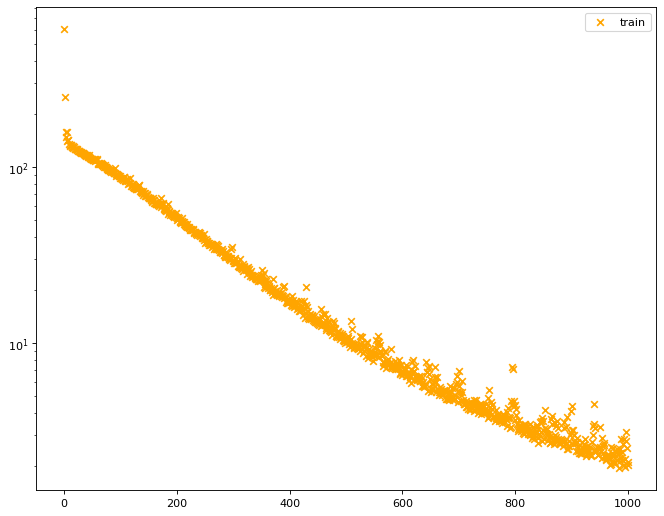

In [14]:
nn2.plot_loss()